In [1]:
import tensorflow as tf

In [3]:
x = tf.ones(shape=(2,1))

In [4]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [6]:
x = tf.zeros(shape=(2,1))

In [7]:
x

<tf.Tensor: id=8, shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [8]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
x

<tf.Tensor: id=14, shape=(3, 1), dtype=float32, numpy=
array([[ 2.2692645 ],
       [-0.26445737],
       [-0.78577805]], dtype=float32)>

In [9]:
x = tf.random.uniform(shape=(3,1), minval=0.,maxval=1.)

In [10]:
x

<tf.Tensor: id=21, shape=(3, 1), dtype=float32, numpy=
array([[0.2269572 ],
       [0.69531107],
       [0.76719403]], dtype=float32)>

In [16]:
import numpy as np
x = np.ones(shape=(2,1))
x

array([[1.],
       [1.]])

In [17]:
x[0,0] =5

In [18]:
x

array([[5.],
       [1.]])

In [19]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [20]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.8202579 ],
       [0.06981014],
       [0.17267211]], dtype=float32)>


In [22]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [23]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [24]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [25]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [26]:
a = tf.ones((2,2))
a

<tf.Tensor: id=58, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [28]:
b = a + a

In [29]:
b

<tf.Tensor: id=59, shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [30]:
b = tf.square(b)

In [31]:
b

<tf.Tensor: id=60, shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [32]:
c = tf.sqrt(b)

In [33]:
c

<tf.Tensor: id=61, shape=(2, 2), dtype=float32, numpy=
array([[1.9999999, 1.9999999],
       [1.9999999, 1.9999999]], dtype=float32)>

In [34]:
d = c + b

In [35]:
d

<tf.Tensor: id=62, shape=(2, 2), dtype=float32, numpy=
array([[6., 6.],
       [6., 6.]], dtype=float32)>

In [36]:
e = tf.matmul(b,d)
e

<tf.Tensor: id=63, shape=(2, 2), dtype=float32, numpy=
array([[48., 48.],
       [48., 48.]], dtype=float32)>

In [37]:
e *= d

In [38]:
e

<tf.Tensor: id=64, shape=(2, 2), dtype=float32, numpy=
array([[288., 288.],
       [288., 288.]], dtype=float32)>

In [40]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [41]:
gradient

<tf.Tensor: id=77, shape=(), dtype=float32, numpy=6.0>

In [48]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [49]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [50]:
time=tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [51]:
position

<tf.Tensor: id=103, shape=(), dtype=float32, numpy=0.0>

In [52]:
speed

<tf.Tensor: id=111, shape=(), dtype=float32, numpy=0.0>

In [53]:
acceleration

<tf.Tensor: id=119, shape=(), dtype=float32, numpy=9.8>

In [55]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class)

In [64]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.23902142,  2.1901972 ],
       [-0.116266  ,  1.2868012 ],
       [-0.7658589 ,  3.3556542 ],
       ...,
       [ 1.189697  , -2.2629483 ],
       [ 1.5958916 ,  0.08601047],
       [ 2.155887  , -1.2289231 ]], dtype=float32)

In [65]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype='float32'),
                     np.ones((num_samples_per_class,1),dtype='float32')))

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

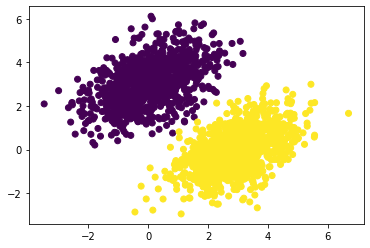

In [61]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [66]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [67]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [68]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [70]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [71]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 3.8562
Loss at step 1: 0.5663
Loss at step 2: 0.1931
Loss at step 3: 0.1380
Loss at step 4: 0.1233
Loss at step 5: 0.1143
Loss at step 6: 0.1067
Loss at step 7: 0.0998
Loss at step 8: 0.0934
Loss at step 9: 0.0876
Loss at step 10: 0.0823
Loss at step 11: 0.0775
Loss at step 12: 0.0730
Loss at step 13: 0.0689
Loss at step 14: 0.0652
Loss at step 15: 0.0618
Loss at step 16: 0.0587
Loss at step 17: 0.0558
Loss at step 18: 0.0532
Loss at step 19: 0.0508
Loss at step 20: 0.0486
Loss at step 21: 0.0466
Loss at step 22: 0.0448
Loss at step 23: 0.0431
Loss at step 24: 0.0416
Loss at step 25: 0.0402
Loss at step 26: 0.0389
Loss at step 27: 0.0377
Loss at step 28: 0.0366
Loss at step 29: 0.0356
Loss at step 30: 0.0347
Loss at step 31: 0.0339
Loss at step 32: 0.0331
Loss at step 33: 0.0324
Loss at step 34: 0.0318
Loss at step 35: 0.0312
Loss at step 36: 0.0307
Loss at step 37: 0.0302
Loss at step 38: 0.0298
Loss at step 39: 0.0294


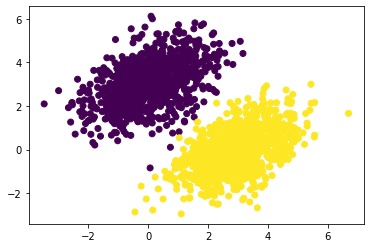

In [72]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

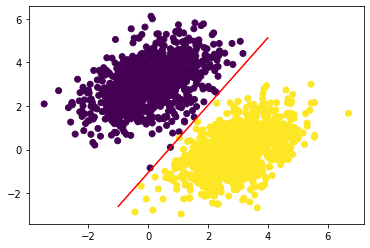

In [74]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5 -b)/W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

In [75]:
from tensorflow import keras

In [76]:
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [77]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [78]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [80]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [81]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(training_inputs,training_targets,epochs=5,batch_size=16,validation_data=(val_inputs,val_targets))

Train on 1400 samples, validate on 600 samples
Epoch 1/5
1400/1400 [==============================] - 1s 934us/sample - loss: 0.3457 - binary_accuracy: 0.9271 - val_loss: 0.0358 - val_binary_accuracy: 0.9967
Epoch 2/5
1400/1400 [==============================] - 0s 238us/sample - loss: 0.0708 - binary_accuracy: 0.9614 - val_loss: 0.1100 - val_binary_accuracy: 0.9650
Epoch 3/5
1400/1400 [==============================] - 0s 245us/sample - loss: 0.0756 - binary_accuracy: 0.9500 - val_loss: 0.0511 - val_binary_accuracy: 0.9817
Epoch 4/5
1400/1400 [==============================] - 0s 247us/sample - loss: 0.0705 - binary_accuracy: 0.9593 - val_loss: 0.0340 - val_binary_accuracy: 0.9933
Epoch 5/5
1400/1400 [==============================] - 0s 249us/sample - loss: 0.0668 - binary_accuracy: 0.9636 - val_loss: 0.4249 - val_binary_accuracy: 0.7883


In [82]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

600/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [83]:
predictions = model.predict(val_inputs, batch_size=128)

In [87]:
print(predictions[:10])

[[ 0.22219327]
 [ 0.72640055]
 [ 2.0359788 ]
 [ 0.45979562]
 [-0.31200987]
 [ 1.5718913 ]
 [ 0.27509427]
 [ 1.0318935 ]
 [ 0.2724698 ]
 [ 0.77207035]]
